<a href="https://colab.research.google.com/github/t1mmb0/probalistic-machine-learning/blob/main/Regression_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Deutschlandatlas-KRS1222.csv", header=0, sep=";")

In [3]:
df.head()

,KRS1222,Kreisname,fl_suv,fl_landw,fl_wald,bev_binw,bev_ausw,ko_kasskred,bev_u18,bev_18_65,...,auto,v_harzt,v_karzt,schule_oabschl,kbetr_u3,kbetr_ue3,kbetr_ue6,kinder_bg,straft,einbr
0,1001000,Flensburg. Stadt,53.50,22.12,6.73,49.81,167.15,0.00,16.02,64.02,...,495.3,65.1,66.4,8.09,38.41,86.78,26.74,21.55,10767.15,117.77
1,1002000,Kiel. Landeshauptstadt,58.78,23.45,6.94,-12.80,115.33,181.66,15.03,65.99,...,449.8,67.2,78.4,9.34,36.44,91.37,22.46,24.44,10684.77,117.07
2,1003000,Lübeck. Hansestadt,37.86,30.23,15.44,30.67,116.23,268.90,15.22,61.36,...,467.0,67.5,83.8,11.34,39.60,93.48,14.27,20.98,10322.11,131.14
3,1004000,Neumünster. Stadt,51.81,37.72,4.65,-286.79,359.36,0.00,16.45,60.50,...,543.5,58.2,65.1,9.51,31.59,83.00,20.39,20.73,18117.78,225.15
4,1051000,Dithmarschen,11.28,75.22,3.83,66.47,105.51,0.00,15.74,58.73,...,621.3,63.0,45.7,12.14,25.69,87.67,12.46,14.75,5401.03,116.08


# BASIC DF INFORMATIONS:

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KRS1222         400 non-null    int64  
 1   Kreisname       400 non-null    object 
 2   fl_suv          400 non-null    float64
 3   fl_landw        400 non-null    float64
 4   fl_wald         400 non-null    float64
 5   bev_binw        400 non-null    float64
 6   bev_ausw        400 non-null    float64
 7   ko_kasskred     400 non-null    float64
 8   bev_u18         400 non-null    float64
 9   bev_18_65       400 non-null    float64
 10  bev_ue65        400 non-null    float64
 11  bev_ausl        400 non-null    float64
 12  mitgl_sportv    400 non-null    float64
 13  ew_sportv       400 non-null    float64
 14  preis_miet      400 non-null    object 
 15  wohn_eigen      400 non-null    float64
 16  wohn_leer       400 non-null    float64
 17  wohn_EZFH       400 non-null    flo

In [5]:
for val in df['preis_miet'].unique():
    print(repr(val))

'8.50 bis unter 10.00'
'10.00 bis unter 11.50'
'7.00 bis unter 8.50'
'11.50 und mehr'
'5.50 bis unter 7.00'
'bis unter 5.50'


In [6]:
ordinal_map = {
    'bis unter 5.50': 1,
    '5.50 bis unter 7.00': 2,
    '7.00 bis unter 8.50': 3,
    '8.50 bis unter 10.00': 4,
    '10.00 bis unter 11.50': 5,
    '11.50 und mehr': 6
}

df['preis_miet'] = df['preis_miet'].map(ordinal_map)

In [7]:
print(df['preis_miet'].unique())
df['preis_miet'].head()

[4 5 3 6 2 1]


,preis_miet
0,4
1,4
2,5
3,3
4,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KRS1222         400 non-null    int64  
 1   Kreisname       400 non-null    object 
 2   fl_suv          400 non-null    float64
 3   fl_landw        400 non-null    float64
 4   fl_wald         400 non-null    float64
 5   bev_binw        400 non-null    float64
 6   bev_ausw        400 non-null    float64
 7   ko_kasskred     400 non-null    float64
 8   bev_u18         400 non-null    float64
 9   bev_18_65       400 non-null    float64
 10  bev_ue65        400 non-null    float64
 11  bev_ausl        400 non-null    float64
 12  mitgl_sportv    400 non-null    float64
 13  ew_sportv       400 non-null    float64
 14  preis_miet      400 non-null    int64  
 15  wohn_eigen      400 non-null    float64
 16  wohn_leer       400 non-null    float64
 17  wohn_EZFH       400 non-null    flo

In [9]:
df.describe()

,KRS1222,fl_suv,fl_landw,fl_wald,bev_binw,bev_ausw,ko_kasskred,bev_u18,bev_18_65,bev_ue65,...,auto,v_harzt,v_karzt,schule_oabschl,kbetr_u3,kbetr_ue3,kbetr_ue6,kinder_bg,straft,einbr
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,8.286572e+06,21.844150,44.158275,29.748675,7.104700,169.599150,349.720550,16.709075,60.244500,23.046275,...,608.594000,61.745750,50.347000,7.112625,35.794250,90.444175,24.226150,11.266725,6124.877125,71.534675
std,3.746996e+06,15.503503,15.734140,14.746133,126.707294,140.307956,953.779797,1.202370,2.577583,3.056695,...,77.449475,6.136058,18.731618,2.484500,12.137774,4.488488,20.672625,5.837065,2830.599963,52.257141
min,1.001000e+06,5.420000,3.970000,2.070000,-1238.080000,40.100000,0.000000,12.890000,53.260000,15.790000,...,328.900000,44.900000,13.400000,2.020000,15.970000,74.710000,7.410000,2.620000,2170.690000,6.780000
25%,5.761000e+06,11.460000,32.522500,17.852500,3.627500,112.252500,0.000000,15.845000,58.825000,21.175000,...,570.775000,57.600000,40.775000,5.300000,26.997500,88.160000,12.325000,7.127500,4178.165000,30.565000
50%,8.233000e+06,14.395000,43.980000,29.155000,33.790000,134.085000,8.880000,16.870000,60.260000,22.580000,...,624.250000,61.550000,45.600000,6.830000,32.405000,90.560000,15.885000,9.940000,5458.390000,63.210000
75%,9.675250e+06,29.557500,56.242500,40.825000,57.392500,170.592500,203.217500,17.590000,61.422500,24.600000,...,659.400000,65.400000,56.975000,8.455000,39.900000,93.385000,24.040000,14.060000,7295.175000,94.837500
max,1.607700e+07,75.370000,79.600000,70.510000,181.630000,1642.030000,8615.600000,20.250000,68.130000,32.450000,...,980.400000,89.900000,132.100000,15.190000,63.610000,103.810000,85.790000,37.960000,19218.620000,283.060000


In [10]:
for name in df.columns:
  max = df[name].idxmax()
  print("first max in cat.", name, ":", df["Kreisname"].loc[max], df[name].max())



first max in cat. KRS1222 : Altenburger Land 16077000
first max in cat. Kreisname : Zwickau Zwickau
first max in cat. fl_suv : München. Landeshauptstadt 75.37
first max in cat. fl_landw : Wesermarsch 79.6
first max in cat. fl_wald : Suhl. Stadt 70.51
first max in cat. bev_binw : Kusel 181.63
first max in cat. bev_ausw : Suhl. Stadt 1642.03
first max in cat. ko_kasskred : Pirmasens. kreisfreie Stadt 8615.6
first max in cat. bev_u18 : Cloppenburg 20.25
first max in cat. bev_18_65 : Heidelberg. Stadtkreis 68.13
first max in cat. bev_ue65 : Suhl. Stadt 32.45
first max in cat. bev_ausl : Offenbach am Main. Stadt 38.97
first max in cat. mitgl_sportv : Gelsenkirchen. Stadt 76.12
first max in cat. ew_sportv : St. Wendel 285.25
first max in cat. preis_miet : Hamburg. Freie und Hansestadt 6
first max in cat. wohn_eigen : Südwestpfalz 73.1
first max in cat. wohn_leer : Altenburger Land 14.99
first max in cat. wohn_EZFH : Straubing-Bogen 49.2
first max in cat. wohn_MFH : Straubing 99.3
first max i

# Understanding Data

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'flu_sv')

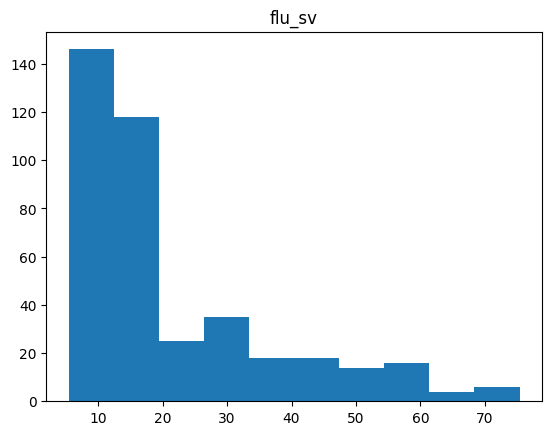

In [14]:
sns.histplot(df["fl_suv"], x="")


In [20]:
df_corr = df[df.columns.difference(['Kreisname'])]

In [22]:
df_corr = df_corr[df_corr.columns.difference(['KRS1222'])]

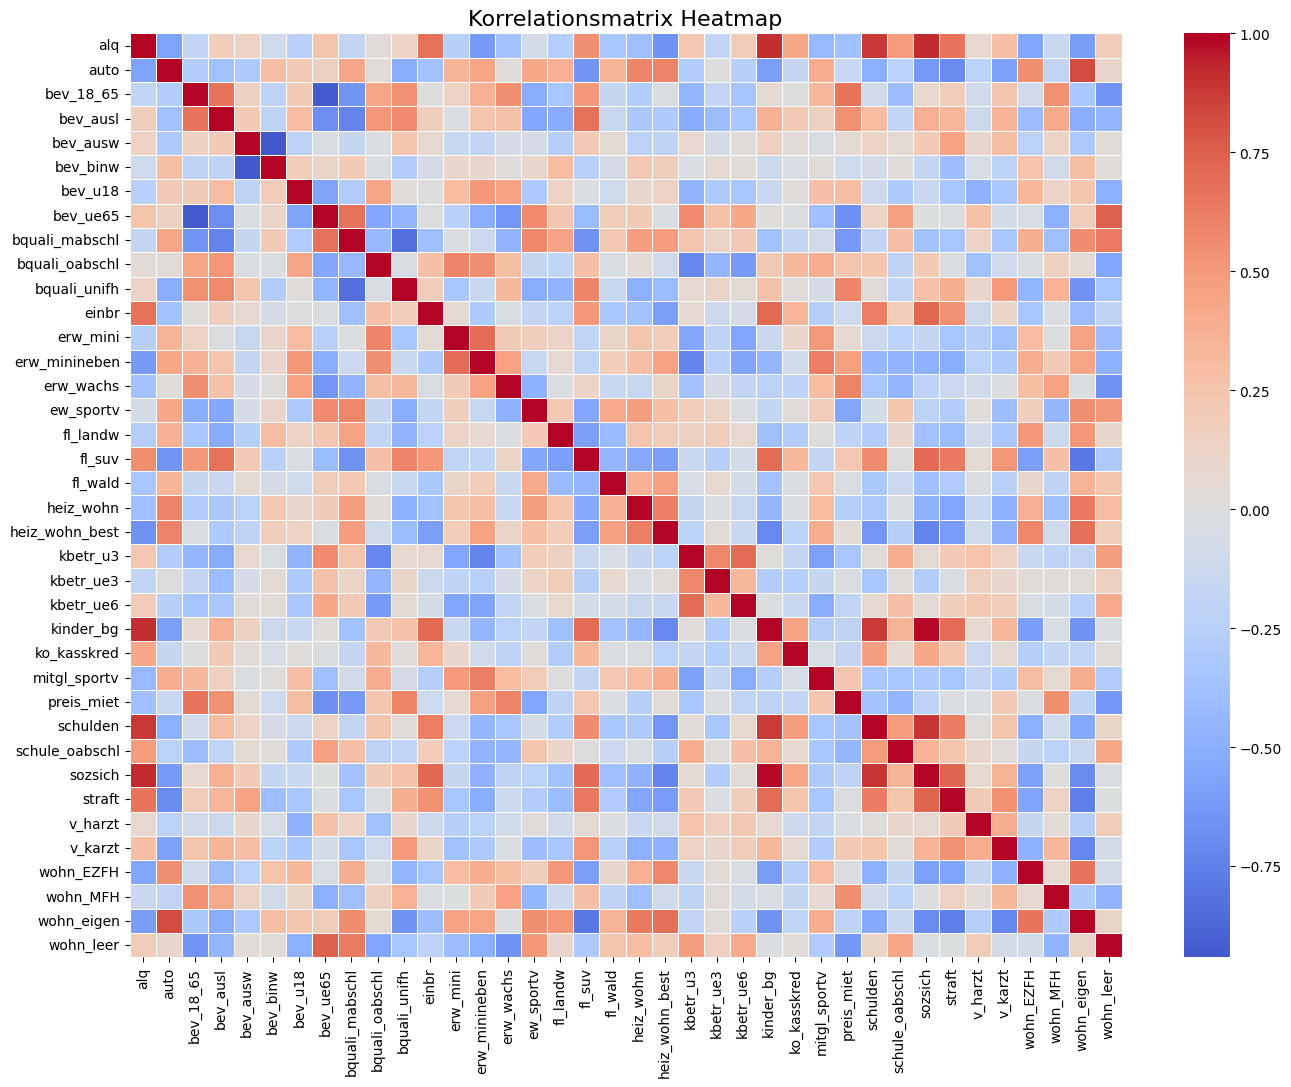

In [25]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix,
            annot=False,
            cmap='coolwarm',
            center=0,
            linewidths=0.5)

plt.title("Korrelationsmatrix Heatmap", fontsize=16)
plt.show()

In [28]:
import numpy as np

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr = corr_matrix.mask(~mask).stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Korrelation']
high_corr = high_corr[(high_corr['Korrelation'].abs() > 0.7)]
high_corr = high_corr[(high_corr['Korrelation'].abs() <1)]
print(high_corr.sort_values(by='Korrelation', ascending=False))


          Feature 1       Feature 2  Korrelation
642       kinder_bg         sozsich     0.980173
30              alq         sozsich     0.922601
24              alq       kinder_bg     0.911773
688        schulden         sozsich     0.888712
28              alq        schulden     0.883346
640       kinder_bg        schulden     0.873930
73             auto      wohn_eigen     0.824900
275        bev_ue65       wohn_leer     0.742985
706         sozsich          straft     0.732648
382           einbr         sozsich     0.720765
376           einbr       kinder_bg     0.714165
523          fl_suv         sozsich     0.706842
517          fl_suv       kinder_bg     0.701429
574  heiz_wohn_best       kinder_bg    -0.713962
318  bquali_oabschl        kbetr_u3    -0.716381
729         v_karzt      wohn_eigen    -0.718108
580  heiz_wohn_best         sozsich    -0.731191
424   erw_minineben        kbetr_u3    -0.732987
116        bev_ausl  bquali_mabschl    -0.734456
718          straft 